In [1]:
import sys
sys.path.append('C:/Users/ug033207/dynamic scheduling/dynamic-scheduling/functions')
from point_rating import point_rating
from first_model import first_model
from dynamic_model import dynamic_model
from first_round_rating import first_round_rating
from Elo_rating import Elo_rating
from generate_results import generate_results

import random
from pyomo.environ import *
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time
import copy
import math




In [2]:
n = 20

teams = list(range(1,n+1))
days = list(range(1,n))
days2 = list(range(20,2*n-1))

#result_df = generate_results(teams)
result_df = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain first half')
#result_df = generate_results(teams)
result_df = pd.DataFrame(result_df)

result_df2 = pd.read_excel('C:/Users/ug033207/match_resultlar.xlsx', sheet_name= 'Spain second half')
#result_df2 = generate_results(teams)
result_df2 = pd.DataFrame(result_df2)

#random.seed(1)
#Spanish old ratings
#old_ratings = {1:1983,2:1876,3:1869,4:1840,5:1827,6:1779,7:1756, 8:1739,9:1708,10:1698,11:1673,12:1669,13:1651,14:1648,15:1646,16:1631, 17:1630, 18:1617, 19:1615, 20:1610}
#German old ratings
#old_ratings = {1:1958,2:1811,3:1800,4:1795,5:1737,6:1731,7:1719,8:1712,9:1682,10:1680,11:1679,12:1664,13:1621,14:1616,15:1613,16:1599,17:1597, 18:1579}



with pd.ExcelWriter('C:/Users/ug033207/match_resultlar2.xlsx', engine='xlsxwriter') as writer:
    # Write the first DataFrame to the 'random1' sheet
    result_df.to_excel(writer, sheet_name='random1', index=False)

    # Write the second DataFrame to the 'random2' sheet, specifying mode='a' (append)
    result_df2.to_excel(writer, sheet_name='random2', index=False)

#days_dynamic = [x for x in days if x != 1] 



objective_values = []
objective_values2 = []




big_obj_values2 = []


In [3]:
for t in range(1,20):
    
    big_obj_values = []
    objective_values = []
    objective_values2 = []

    old_ratings = {i: 0 for i in range(1, n+1)}


    U_ij = np.zeros((n, n)) 
    ratings_array = np.array(list(old_ratings.values()))
    for i in range(n):
        for j in range(n):
            U_ij[i, j] = abs((ratings_array[i] - ratings_array[j]))

        ratings = old_ratings
        ratings_df = pd.DataFrame(U_ij, columns=teams, index=teams)


    solution_df = first_model(teams, days)
    for d in days:

        obj_count = 0
        for _, row in solution_df.iterrows():
            team1 = row['Team 1']
            team2 = row['Team 2']
            day = row['Day']
            if d == day:
                obj_count += ratings_df.iloc[team1-1, team2-1]

        d= [d]
        ratings, ratings_df = point_rating(ratings, teams, solution_df, result_df, d)
        print(ratings)
        print(obj_count)
        objective_values.append(obj_count)

    solution_df2 = first_model(teams, days)
    for d in days:

        obj_count = 0
        for _, row in solution_df2.iterrows():
            team1 = row['Team 1']
            team2 = row['Team 2']
            day = row['Day']
            if d == day:
                obj_count += ratings_df.iloc[team1-1, team2-1]

        d= [d]
        ratings, ratings_df = point_rating(ratings, teams, solution_df2, result_df2, d)
        print(ratings)
        print(obj_count)
        objective_values2.append(obj_count)
    big_obj_values.append(sum(objective_values + objective_values2))
    big_obj_values2.append(big_obj_values)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-12-15
Read LP format model from file C:\Users\ug033207\AppData\Local\Temp\tmpp_o3igom.pyomo.lp
Reading time = 0.02 seconds
x1: 950 rows, 7600 columns, 22037 nonzeros
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 950 rows, 7600 columns and 22037 nonzeros
Model fingerprint: 0xcc82542e
Variable types: 1 continuous, 7599 integer (7599 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 383 rows and 4045 columns
Presolve time: 0.03s
Presolved: 567 rows, 3555 columns, 10665 nonzeros
Variable types: 0 continuous, 3555 integer (3555 binary)

Root relaxation: objective 1.0000

{1: 78, 2: 88, 3: 77, 4: 64, 5: 49, 6: 60, 7: 71, 8: 51, 9: 43, 10: 42, 11: 43, 12: 53, 13: 42, 14: 37, 15: 38, 16: 25, 17: 41, 18: 49, 19: 50, 20: 49}
[  0.  13.  21.  21.  31.  29.  31.  51.  57.  48.  70.  73.  92.  95.
  88.  93. 119.  99. 115.  93.  93. 118. 117. 115. 120. 128. 134. 130.
 141. 159. 179. 180. 198. 209. 186. 189. 185. 190.]
4010.0


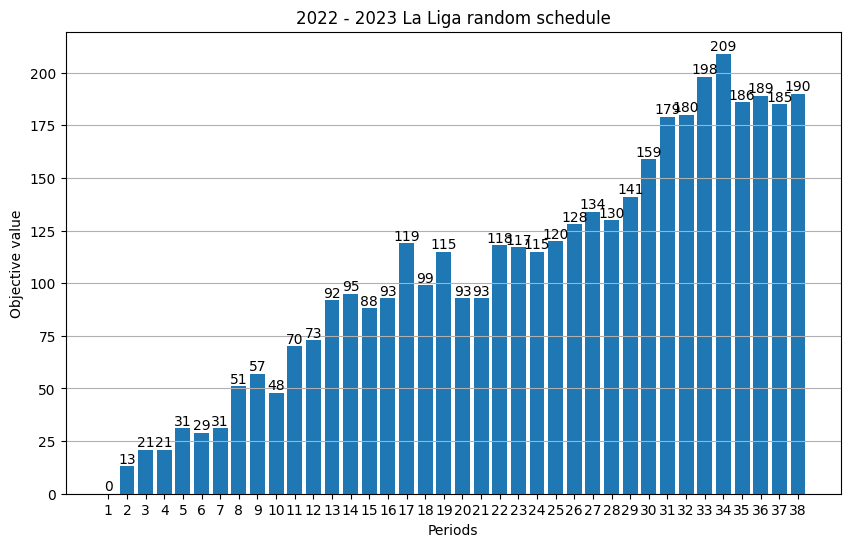

In [4]:
obje =  objective_values + objective_values2
print(ratings)
obje = np.array(obje)
print(obje)
print(sum(obje))


plt.figure(figsize=(10,6))
bars = plt.bar(range(len(obje)), obje)
plt.bar_label(bars)
plt.xlabel('Periods')
plt.ylabel('Objective value')
plt.title('2022 - 2023 La Liga random schedule')

# Change the x-axis tick labels
new_tick_labels = [i for i in range(1, 39)]
#y = [i for i in range(20, 36)]  # New tick labels
#new_tick_labels2 = new_tick_labels + y
plt.xticks(range(len(obje)), new_tick_labels)

plt.grid(axis='y')  # Show grid on the y-axis
#plt.ylim(0,100)
plt.show()

4039.3684210526317
[[4118.0], [3936.0], [4212.0], [4037.0], [4018.0], [4196.0], [4010.0], [4055.0], [4048.0], [4089.0], [4087.0], [4031.0], [4008.0], [3898.0], [4012.0], [3917.0], [3964.0], [4102.0], [4010.0]]
1


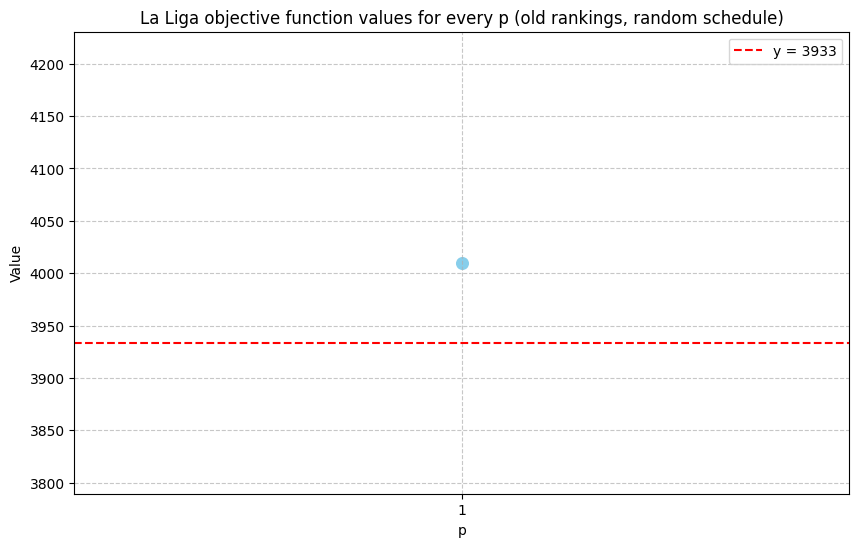

In [7]:
mean = np.array(big_obj_values2)
mean = np.mean(mean)
print(mean)
print(big_obj_values2)
print(len(big_obj_values))
# Your existing code to create the scatter plot
indices = range(1, len(big_obj_values) + 1)

plt.figure(figsize=(10, 6))
plt.scatter(indices, big_obj_values, color='skyblue', s=70)
plt.title('La Liga objective function values for every p (old rankings, random schedule)')
plt.xlabel('p')
plt.ylabel('Value')
plt.xticks(indices)  # Set x-axis ticks to match indices
plt.grid(True, linestyle='--', alpha=0.7)

# Adding a straight line at y = 45867 with red color
plt.axhline(y=3933, color='red', linestyle='--', label='y = 3933')

plt.legend()  # Show the legend including the added line
plt.show()


In [6]:
[3969.0, 8112.0, 12036.0, 15977.0, 20011.0, 24166.0, 28087.0, 32243.0, 36390.0, 40341.0, 44349.0, 48311.0, 52341.0, 56366.0, 60458.0, 64481.0, 68466.0, 72547.0, 76658.0, 80644.0, 84791.0, 88779.0, 92944.0, 97047.0, 101178.0, 105255.0, 109250.0, 113271.0, 117238.0, 121328.0, 125152.0, 129185.0, 133241.0, 137256.0, 141311.0, 145311.0, 149400.0, 153294.0, 157443.0, 161649.0, 165731.0, 169804.0, 173860.0, 177781.0, 181780.0, 185804.0, 189718.0, 193852.0, 198035.0, 201936.0, 205960.0, 210105.0, 214156.0, 218206.0, 222207.0, 226293.0, 230519.0, 234576.0, 238569.0, 242576.0, 246661.0, 250707.0, 254706.0, 258540.0, 262682.0, 266826.0, 270648.0, 274576.0, 278616.0, 282643.0, 286673.0, 290770.0, 294801.0, 298845.0, 302889.0, 306973.0, 311029.0, 315075.0, 319077.0, 323046.0, 327101.0, 331048.0, 335181.0, 339071.0, 342864.0, 346916.0, 350938.0, 354999.0, 359172.0, 363081.0, 366844.0, 370876.0, 375055.0, 378977.0, 383072.0, 387062.0, 390762.0, 394701.0, 398656.0]


[3969.0,
 8112.0,
 12036.0,
 15977.0,
 20011.0,
 24166.0,
 28087.0,
 32243.0,
 36390.0,
 40341.0,
 44349.0,
 48311.0,
 52341.0,
 56366.0,
 60458.0,
 64481.0,
 68466.0,
 72547.0,
 76658.0,
 80644.0,
 84791.0,
 88779.0,
 92944.0,
 97047.0,
 101178.0,
 105255.0,
 109250.0,
 113271.0,
 117238.0,
 121328.0,
 125152.0,
 129185.0,
 133241.0,
 137256.0,
 141311.0,
 145311.0,
 149400.0,
 153294.0,
 157443.0,
 161649.0,
 165731.0,
 169804.0,
 173860.0,
 177781.0,
 181780.0,
 185804.0,
 189718.0,
 193852.0,
 198035.0,
 201936.0,
 205960.0,
 210105.0,
 214156.0,
 218206.0,
 222207.0,
 226293.0,
 230519.0,
 234576.0,
 238569.0,
 242576.0,
 246661.0,
 250707.0,
 254706.0,
 258540.0,
 262682.0,
 266826.0,
 270648.0,
 274576.0,
 278616.0,
 282643.0,
 286673.0,
 290770.0,
 294801.0,
 298845.0,
 302889.0,
 306973.0,
 311029.0,
 315075.0,
 319077.0,
 323046.0,
 327101.0,
 331048.0,
 335181.0,
 339071.0,
 342864.0,
 346916.0,
 350938.0,
 354999.0,
 359172.0,
 363081.0,
 366844.0,
 370876.0,
 375055.0,
 37